# Feature Engineering (time series)

## Preparación de ambiente

## Carga de módulos

In [3]:
# Misc
from warnings import filterwarnings

# Data Wrangling
import pandas as pd
import datetime as dt

# Data Visualization
import cufflinks as cf

# Data download
import yfinance as yf
# from yahoofinancials import YahooFinancials

# Environment setup
cf.go_offline()
filterwarnings("ignore")

## Data Wrangling

### Lectura de datos

In [5]:
df = pd.read_csv("./AAPL.csv")

In [6]:
df

Date        Open        High         Low       Close   Adj Close  \
0      1980-12-12    0.128348    0.128906    0.128348    0.128348    0.100600   
1      1980-12-15    0.122210    0.122210    0.121652    0.121652    0.095352   
2      1980-12-16    0.113281    0.113281    0.112723    0.112723    0.088353   
3      1980-12-17    0.115513    0.116071    0.115513    0.115513    0.090540   
4      1980-12-18    0.118862    0.119420    0.118862    0.118862    0.093165   
...           ...         ...         ...         ...         ...         ...   
10253  2021-08-12  146.190002  149.050003  145.839996  148.889999  148.889999   
10254  2021-08-13  148.970001  149.440002  148.270004  149.100006  149.100006   
10255  2021-08-16  148.539993  151.190002  146.470001  151.119995  151.119995   
10256  2021-08-17  150.229996  151.679993  149.089996  150.190002  150.190002   
10257  2021-08-18  149.800003  150.720001  146.149994  146.360001  146.360001   

          Volume  
0      469033600  
1      175884800  
2      105728000  
3       86441600  
4       73449600  
...          ...  
10253   72282600  
10254   59318800  
10255  103296000  
10256   92229700  
10257   84715400  

[10258 rows x 7 columns]

### Descarga de datos

In [7]:
aapl_df = yf.download('AAPL', 
                      start='2010-01-01', 
                      end='2022-03-09', 
                      progress=True,
)
aapl_df.tail()

[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-03-02  164.389999  167.360001  162.949997  166.559998  165.328415   
2022-03-03  168.470001  168.910004  165.550003  166.229996  165.000870   
2022-03-04  164.490005  165.550003  162.100006  163.169998  161.963470   
2022-03-07  163.360001  165.020004  159.039993  159.300003  158.122101   
2022-03-08  158.820007  162.880005  155.800003  157.440002  156.275848   

               Volume  
Date                   
2022-03-02   79724800  
2022-03-03   76678400  
2022-03-04   83737200  
2022-03-07   96418800  
2022-03-08  131148300

In [8]:
aapl_df[aapl_df.index.astype(str) == "2021-08-18"]

Open        High         Low       Close  Adj Close  \
Date                                                                    
2021-08-18  149.800003  150.720001  146.149994  146.360001  144.88147   

              Volume  
Date                  
2021-08-18  86326000

### Conversión de tipos

In [9]:
df["Date"] = pd.to_datetime(df["Date"])

In [10]:
df = df.sort_values(by=["Date"])

### EDA

In [11]:
df["Date"].diff().mean()

Timedelta('1 days 10:46:05.019011406')

In [12]:
df

Date        Open        High         Low       Close   Adj Close  \
0     1980-12-12    0.128348    0.128906    0.128348    0.128348    0.100600   
1     1980-12-15    0.122210    0.122210    0.121652    0.121652    0.095352   
2     1980-12-16    0.113281    0.113281    0.112723    0.112723    0.088353   
3     1980-12-17    0.115513    0.116071    0.115513    0.115513    0.090540   
4     1980-12-18    0.118862    0.119420    0.118862    0.118862    0.093165   
...          ...         ...         ...         ...         ...         ...   
10253 2021-08-12  146.190002  149.050003  145.839996  148.889999  148.889999   
10254 2021-08-13  148.970001  149.440002  148.270004  149.100006  149.100006   
10255 2021-08-16  148.539993  151.190002  146.470001  151.119995  151.119995   
10256 2021-08-17  150.229996  151.679993  149.089996  150.190002  150.190002   
10257 2021-08-18  149.800003  150.720001  146.149994  146.360001  146.360001   

          Volume  
0      469033600  
1      175884800  
2      105728000  
3       86441600  
4       73449600  
...          ...  
10253   72282600  
10254   59318800  
10255  103296000  
10256   92229700  
10257   84715400  

[10258 rows x 7 columns]

In [13]:
df["Date"].diff().value_counts()

Date
1 days    8039
3 days    1867
4 days     253
2 days      95
5 days       2
7 days       1
Name: count, dtype: int64

In [14]:
df["Date"].diff()

0          NaT
1       3 days
2       1 days
3       1 days
4       1 days
         ...  
10253   1 days
10254   1 days
10255   3 days
10256   1 days
10257   1 days
Name: Date, Length: 10258, dtype: timedelta64[ns]

In [15]:
df["Date"].diff().dt.days

0        NaN
1        3.0
2        1.0
3        1.0
4        1.0
        ... 
10253    1.0
10254    1.0
10255    3.0
10256    1.0
10257    1.0
Name: Date, Length: 10258, dtype: float64

In [16]:
df[df["Date"].diff().dt.days==7]

Date      Open      High       Low     Close  Adj Close     Volume
5242 2001-09-17  0.285714  0.304821  0.280893  0.303393   0.260498  458007200

In [17]:
df = df.set_index("Date").sort_index()

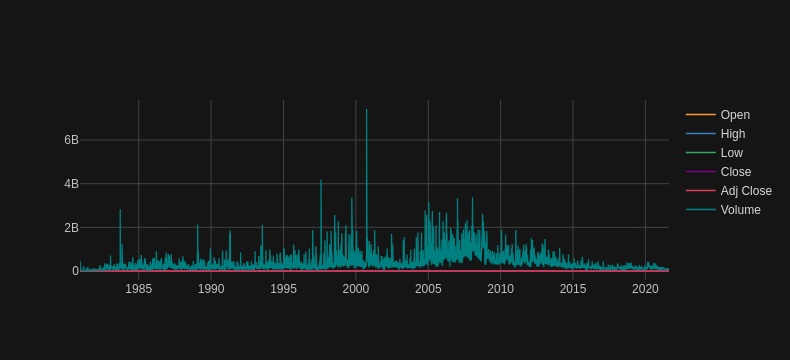

In [18]:
df.iplot()

In [19]:
df = df[df.index.year >= 2010]

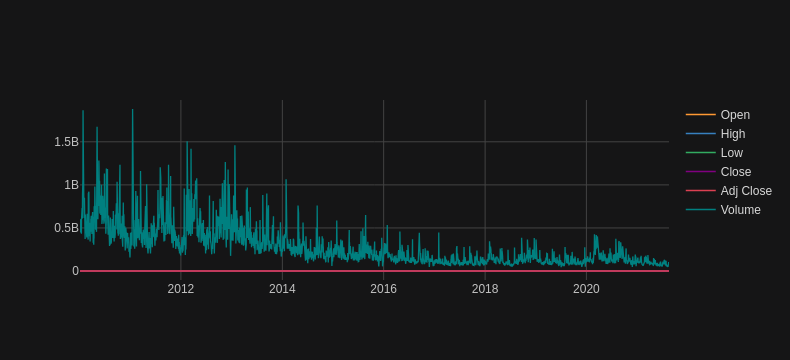

In [20]:
df.iplot()

### Feature Engineering

#### Variables "crudas"

In [21]:
df["Range"] = df["High"] - df["Low"]
df["Intervalo"] = df["Close"] - df["Open"]
df["RatioCA"] = df["Close"] / df["Open"]
df["RatioHL"] = df["High"] / df["Low"]

In [22]:
df

Open        High         Low       Close   Adj Close  \
Date                                                                     
2010-01-04    7.622500    7.660714    7.585000    7.643214    6.562591   
2010-01-05    7.664286    7.699643    7.616071    7.656429    6.573935   
2010-01-06    7.656429    7.686786    7.526786    7.534643    6.469369   
2010-01-07    7.562500    7.571429    7.466071    7.520714    6.457407   
2010-01-08    7.510714    7.571429    7.466429    7.570714    6.500339   
...                ...         ...         ...         ...         ...   
2021-08-12  146.190002  149.050003  145.839996  148.889999  148.889999   
2021-08-13  148.970001  149.440002  148.270004  149.100006  149.100006   
2021-08-16  148.539993  151.190002  146.470001  151.119995  151.119995   
2021-08-17  150.229996  151.679993  149.089996  150.190002  150.190002   
2021-08-18  149.800003  150.720001  146.149994  146.360001  146.360001   

               Volume     Range  Intervalo   RatioCA   RatioHL  
Date                                                            
2010-01-04  493729600  0.075714   0.020714  1.002717  1.009982  
2010-01-05  601904800  0.083572  -0.007857  0.998975  1.010973  
2010-01-06  552160000  0.160000  -0.121786  0.984094  1.021257  
2010-01-07  477131200  0.105358  -0.041786  0.994475  1.014112  
2010-01-08  447610800  0.105000   0.060000  1.007989  1.014063  
...               ...       ...        ...       ...       ...  
2021-08-12   72282600  3.210007   2.699997  1.018469  1.022010  
2021-08-13   59318800  1.169998   0.130005  1.000873  1.007891  
2021-08-16  103296000  4.720001   2.580002  1.017369  1.032225  
2021-08-17   92229700  2.589997  -0.039994  0.999734  1.017372  
2021-08-18   84715400  4.570007  -3.440002  0.977036  1.031269  

[2927 rows x 10 columns]

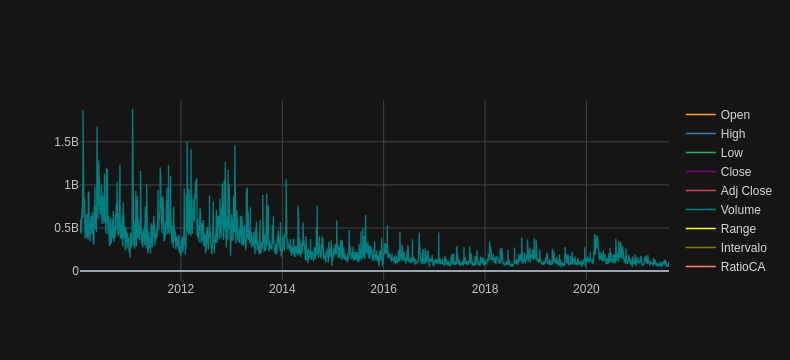

In [23]:
df.iplot()

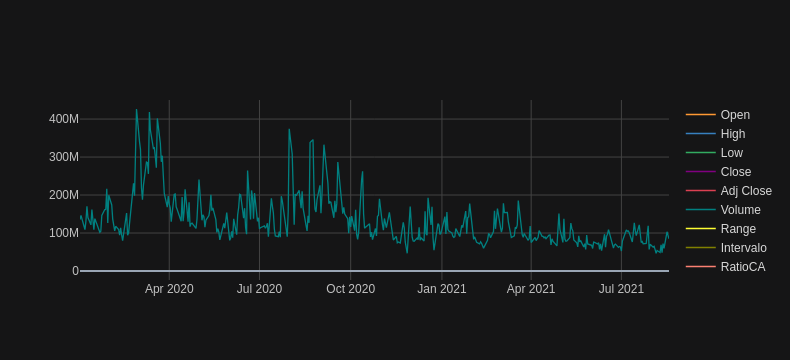

In [24]:
df[df.index.year>=2020].iplot()

#### Creación de target

In [25]:
df["y"] = df["Close"].shift(-1)

In [26]:
df

Open        High         Low       Close   Adj Close  \
Date                                                                     
2010-01-04    7.622500    7.660714    7.585000    7.643214    6.562591   
2010-01-05    7.664286    7.699643    7.616071    7.656429    6.573935   
2010-01-06    7.656429    7.686786    7.526786    7.534643    6.469369   
2010-01-07    7.562500    7.571429    7.466071    7.520714    6.457407   
2010-01-08    7.510714    7.571429    7.466429    7.570714    6.500339   
...                ...         ...         ...         ...         ...   
2021-08-12  146.190002  149.050003  145.839996  148.889999  148.889999   
2021-08-13  148.970001  149.440002  148.270004  149.100006  149.100006   
2021-08-16  148.539993  151.190002  146.470001  151.119995  151.119995   
2021-08-17  150.229996  151.679993  149.089996  150.190002  150.190002   
2021-08-18  149.800003  150.720001  146.149994  146.360001  146.360001   

               Volume     Range  Intervalo   RatioCA   RatioHL           y  
Date                                                                        
2010-01-04  493729600  0.075714   0.020714  1.002717  1.009982    7.656429  
2010-01-05  601904800  0.083572  -0.007857  0.998975  1.010973    7.534643  
2010-01-06  552160000  0.160000  -0.121786  0.984094  1.021257    7.520714  
2010-01-07  477131200  0.105358  -0.041786  0.994475  1.014112    7.570714  
2010-01-08  447610800  0.105000   0.060000  1.007989  1.014063    7.503929  
...               ...       ...        ...       ...       ...         ...  
2021-08-12   72282600  3.210007   2.699997  1.018469  1.022010  149.100006  
2021-08-13   59318800  1.169998   0.130005  1.000873  1.007891  151.119995  
2021-08-16  103296000  4.720001   2.580002  1.017369  1.032225  150.190002  
2021-08-17   92229700  2.589997  -0.039994  0.999734  1.017372  146.360001  
2021-08-18   84715400  4.570007  -3.440002  0.977036  1.031269         NaN  

[2927 rows x 11 columns]

In [27]:
for i in range(1, 91):
    for feature in ["Open", "Close", "High", "Low", "Range", "Intervalo", "RatioCA", "RatioHL"]:
        df[f"{feature}(t-{i})"] = df[feature].shift(i)
        df[f"{feature}_diff_{i}"] = df[feature].diff(i)
        df[f"{feature}_pct_{i}"] = df[feature].pct_change(i)
        df[f"{feature}_ma_{i+1}"] = df[feature].rolling(i+1).mean()
        df[f"{feature}_max_{i+1}"] = df[feature].rolling(i+1).max()
        df[f"{feature}_min_{i+1}"] = df[feature].rolling(i+1).min()
        df[f"{feature}_std_{i+1}"] = df[feature].rolling(i+1).std()
        df[f"{feature}_median_{i+1}"] = df[feature].rolling(i+1).median()

In [28]:
df

Open        High         Low       Close   Adj Close  \
Date                                                                     
2010-01-04    7.622500    7.660714    7.585000    7.643214    6.562591   
2010-01-05    7.664286    7.699643    7.616071    7.656429    6.573935   
2010-01-06    7.656429    7.686786    7.526786    7.534643    6.469369   
2010-01-07    7.562500    7.571429    7.466071    7.520714    6.457407   
2010-01-08    7.510714    7.571429    7.466429    7.570714    6.500339   
...                ...         ...         ...         ...         ...   
2021-08-12  146.190002  149.050003  145.839996  148.889999  148.889999   
2021-08-13  148.970001  149.440002  148.270004  149.100006  149.100006   
2021-08-16  148.539993  151.190002  146.470001  151.119995  151.119995   
2021-08-17  150.229996  151.679993  149.089996  150.190002  150.190002   
2021-08-18  149.800003  150.720001  146.149994  146.360001  146.360001   

               Volume     Range  Intervalo   RatioCA   RatioHL  ...  \
Date                                                            ...   
2010-01-04  493729600  0.075714   0.020714  1.002717  1.009982  ...   
2010-01-05  601904800  0.083572  -0.007857  0.998975  1.010973  ...   
2010-01-06  552160000  0.160000  -0.121786  0.984094  1.021257  ...   
2010-01-07  477131200  0.105358  -0.041786  0.994475  1.014112  ...   
2010-01-08  447610800  0.105000   0.060000  1.007989  1.014063  ...   
...               ...       ...        ...       ...       ...  ...   
2021-08-12   72282600  3.210007   2.699997  1.018469  1.022010  ...   
2021-08-13   59318800  1.169998   0.130005  1.000873  1.007891  ...   
2021-08-16  103296000  4.720001   2.580002  1.017369  1.032225  ...   
2021-08-17   92229700  2.589997  -0.039994  0.999734  1.017372  ...   
2021-08-18   84715400  4.570007  -3.440002  0.977036  1.031269  ...   

            RatioCA_std_91  RatioCA_median_91  RatioHL(t-90)  RatioHL_diff_90  \
Date                                                                            
2010-01-04             NaN                NaN            NaN              NaN   
2010-01-05             NaN                NaN            NaN              NaN   
2010-01-06             NaN                NaN            NaN              NaN   
2010-01-07             NaN                NaN            NaN              NaN   
2010-01-08             NaN                NaN            NaN              NaN   
...                    ...                ...            ...              ...   
2021-08-12        0.010925           0.999477       1.011779         0.010232   
2021-08-13        0.010917           1.000544       1.022215        -0.014324   
2021-08-16        0.010931           1.000544       1.014550         0.017675   
2021-08-17        0.010890           0.999734       1.027574        -0.010202   
2021-08-18        0.010915           0.999477       1.016995         0.014275   

            RatioHL_pct_90  RatioHL_ma_91  RatioHL_max_91  RatioHL_min_91  \
Date                                                                        
2010-01-04             NaN            NaN             NaN             NaN   
2010-01-05             NaN            NaN             NaN             NaN   
2010-01-06             NaN            NaN             NaN             NaN   
2010-01-07             NaN            NaN             NaN             NaN   
2010-01-08             NaN            NaN             NaN             NaN   
...                    ...            ...             ...             ...   
2021-08-12        0.010113       1.017201        1.037806        1.007673   
2021-08-13       -0.014013       1.017158        1.037806        1.007673   
2021-08-16        0.017421       1.017268        1.037806        1.007673   
2021-08-17       -0.009928       1.017299        1.037806        1.007673   
2021-08-18        0.014036       1.017340        1.037806        1.007673   

            RatioHL_std_91  RatioHL_median_91  
Date                       

In [29]:
df.corr()

Open      High       Low     Close  Adj Close  \
Open               1.000000  0.999887  0.999837  0.999730   0.999604   
High               0.999887  1.000000  0.999796  0.999858   0.999743   
Low                0.999837  0.999796  1.000000  0.999860   0.999735   
Close              0.999730  0.999858  0.999860  1.000000   0.999879   
Adj Close          0.999604  0.999743  0.999735  0.999879   1.000000   
...                     ...       ...       ...       ...        ...   
RatioHL_ma_91      0.343692  0.345705  0.341126  0.343312   0.346043   
RatioHL_max_91    -0.023723 -0.022504 -0.025382 -0.023978  -0.020214   
RatioHL_min_91     0.504980  0.505798  0.503462  0.504545   0.507219   
RatioHL_std_91     0.112678  0.114669  0.110450  0.112532   0.116538   
RatioHL_median_91  0.336112  0.337671  0.333793  0.335587   0.337898   

                     Volume     Range  Intervalo   RatioCA   RatioHL  ...  \
Open              -0.480861  0.769808   0.005903  0.013752  0.105063  ...   
High              -0.479018  0.774720   0.016283  0.021997  0.111100  ...   
Low               -0.484079  0.761801   0.018516  0.023228  0.096085  ...   
Close             -0.481681  0.768158   0.029151  0.031577  0.103641  ...   
Adj Close         -0.480652  0.768402   0.029344  0.031709  0.104808  ...   
...                     ...       ...        ...       ...       ...  ...   
RatioHL_ma_91      0.122554  0.407217  -0.010216 -0.012145  0.299584  ...   
RatioHL_max_91     0.245857  0.072164  -0.011247 -0.018962  0.190867  ...   
RatioHL_min_91    -0.106670  0.460151  -0.009793  0.004877  0.165383  ...   
RatioHL_std_91     0.208266  0.218983  -0.004271 -0.013074  0.276385  ...   
RatioHL_median_91  0.120329  0.379274  -0.016529 -0.016580  0.252162  ...   

                   RatioCA_std_91  RatioCA_median_91  RatioHL(t-90)  \
Open                     0.279198           0.236259       0.167862   
High                     0.281560           0.238092       0.167898   
Low                      0.276334           0.235604       0.167308   
Close                    0.278902           0.237576       0.167310   
Adj Close                0.279588           0.239290       0.167939   
...                           ...                ...            ...   
RatioHL_ma_91            0.952801          -0.023805       0.278694   
RatioHL_max_91           0.518405          -0.070421       0.110476   
RatioHL_min_91           0.622259          -0.059564       0.304239   
RatioHL_std_91           0.716989           0.044470       0.139425   
RatioHL_median_91        0.876114          -0.129399       0.303357   

                   RatioHL_diff_90  RatioHL_pct_90  RatioHL_ma_91  \
Open                     -0.036374       -0.035950       0.343692   
High                     -0.031798       -0.031233       0.345705   
Low                      -0.042469       -0.042235       0.341126   
Close                    -0.036982       -0.036583       0.343312   
Adj Close                -0.036954       -0.036515       0.346043   
...                            ...             ...            ...   
RatioHL_ma_91            -0.006067        0.000056       1.000000   
RatioHL_max_91            0.046879        0.057130       0.550071   
RatioHL_min_91           -0.117110       -0.115879       0.704772   
RatioHL_std_91            0.083427        0.094574       0.737152   
RatioHL_median_91        -0.057135       -0.053656       0.954768   

                   RatioHL_max_91  RatioHL_min_91  RatioHL_std_91  \
Open                    -0.023723        0.504980        0.112678   
High                    -0.022504        0.505798        0.114669   
Low                     -0.025382        0.503462        0.110450   
Close                   -0.023978        0.504545        0.112532   
Adj Close               -0.020214        0.507219        0.116538   
...                           ...             ...             ...   
RatioHL_ma_91            0.550071        0.704772        0.737152   

In [30]:
df.dropna()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2010-05-13    9.400714    9.464286    9.157143    9.227143    7.922579   
2010-05-14    9.112857    9.160000    8.910714    9.065000    7.783358   
2010-05-17    9.096429    9.149286    8.846786    9.079286    7.795625   
2010-05-18    9.177857    9.233929    8.937857    9.012857    7.738587   
2010-05-19    8.910714    9.032857    8.744643    8.869286    7.615313   
...                ...         ...         ...         ...         ...   
2021-08-11  146.050003  146.720001  145.529999  145.860001  145.860001   
2021-08-12  146.190002  149.050003  145.839996  148.889999  148.889999   
2021-08-13  148.970001  149.440002  148.270004  149.100006  149.100006   
2021-08-16  148.539993  151.190002  146.470001  151.119995  151.119995   
2021-08-17  150.229996  151.679993  149.089996  150.190002  150.190002   

                Volume     Range  Intervalo   RatioCA   RatioHL  ...  \
Date                                                             ...   
2010-05-13   599712400  0.307143  -0.173571  0.981536  1.033541  ...   
2010-05-14   759362800  0.249286  -0.047857  0.994748  1.027976  ...   
2010-05-17   762834800  0.302500  -0.017143  0.998115  1.034193  ...   
2010-05-18   782678400  0.296072  -0.165000  0.982022  1.033126  ...   
2010-05-19  1025726800  0.288214  -0.041428  0.995351  1.032959  ...   
...                ...       ...        ...       ...       ...  ...   
2021-08-11    48493500  1.190002  -0.190002  0.998699  1.008177  ...   
2021-08-12    72282600  3.210007   2.699997  1.018469  1.022010  ...   
2021-08-13    59318800  1.169998   0.130005  1.000873  1.007891  ...   
2021-08-16   103296000  4.720001   2.580002  1.017369  1.032225  ...   
2021-08-17    92229700  2.589997  -0.039994  0.999734  1.017372  ...   

            RatioCA_std_91  RatioCA_median_91  RatioHL(t-90)  RatioHL_diff_90  \
Date                                                                            
2010-05-13        0.015107           1.000372       1.009982         0.023559   
2010-05-14        0.015112           1.000162       1.010973         0.017003   
2010-05-17        0.015113           1.000162       1.021257         0.012936   
2010-05-18        0.015138           1.000162       1.014112         0.019014   
2010-05-19        0.015135           1.000162       1.014063         0.018896   
...                    ...                ...            ...              ...   
2021-08-11        0.010892           0.999477       1.025108        -0.016931   
2021-08-12        0.010925           0.999477       1.011779         0.010232   
2021-08-13        0.010917           1.000544       1.022215        -0.014324   
2021-08-16        0.010931           1.000544       1.014550         0.017675   
2021-08-17        0.010890           0.999734       1.027574        -0.010202   

            RatioHL_pct_90  RatioHL_ma_91  RatioHL_max_91  RatioHL_min_91  \
Date                                                                        
2010-05-13        0.023326       1.025469        1.296110        1.005211   
2010-05-14        0.016818       1.025667        1.296110        1.005211   
2010-05-17        0.012667       1.025922        1.296110        1.005211   
2010-05-18        0.018749       1.026053        1.296110        1.005211   
2010-05-19        0.018634       1.026260        1.296110        1.005211   
...                    ...            ...             ...             ...   
2021-08-11       -0.016516       1.017235        1.037806        1.007673   
2021-08-12        0.010113       1.017201        1.037806        1.007673   
2021-08-13       -0.014013       1.017158        1.037806        1.007673   
2021-08-16        0.017421       1.017268        1.037806        1.007673   
2021-08-17       -0.009928       1.017299        1.037806        1.007673   

            RatioHL_std_91  RatioHL_median_91  
Date          